<a href="https://colab.research.google.com/github/ANS1514/Projects_in_AI-ML/blob/main/hw5pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
train_df = pd.read_csv('/content/Training_set.csv')

print(train_df.head())

      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART


In [16]:
import zipfile
import os

zip_file = '/content/train.zip'
destination_folder = '/content/images'

os.makedirs(destination_folder, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print("Unzipping complete!")

img_dir = '/content/images/train'


Unzipping complete!


      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART
Found 4160 validated image filenames belonging to 75 classes.
Found 1039 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


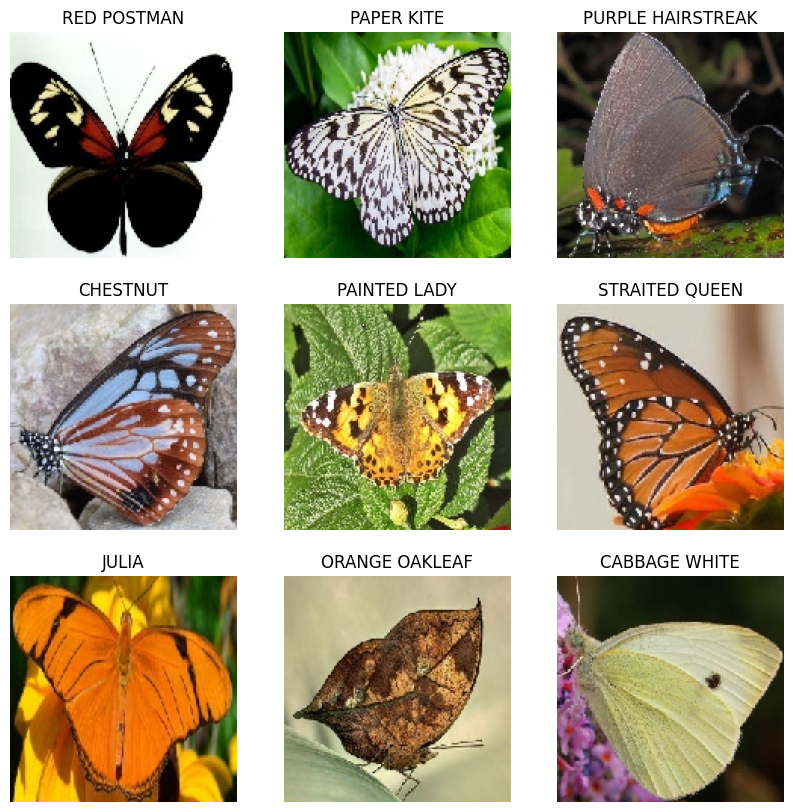

In [17]:
train_df = pd.read_csv('/content/Training_set.csv')

print(train_df.head())

train_split, test_split = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['label'])

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the training generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_split,
    directory=img_dir,
    x_col="filename",
    y_col="label",
    target_size=(150, 150),
    batch_size=256,
    class_mode='categorical',
    subset='training'
)

# Create the validation generator
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_split,
    directory=img_dir,
    x_col="filename",
    y_col="label",
    target_size=(150, 150),
    batch_size=256,
    class_mode='categorical',
    subset='validation'
)

# Create test_split
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_split,
    directory=img_dir,
    x_col="filename",
    y_col="label",
    target_size=(150, 150),
    batch_size=256,
    class_mode='categorical',
    shuffle=False
)

# Visualize images
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(list(train_generator.class_indices.keys())[np.argmax(sample_labels[i])])
    plt.axis('off')
plt.show()

In [18]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# Evaluate the model
evaluation = model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0]:.4f}, Test Accuracy: {evaluation[1]:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 659ms/step - accuracy: 0.0165 - loss: 4.4244 - val_accuracy: 0.0404 - val_loss: 4.2525
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - accuracy: 0.0322 - loss: 4.2106 - val_accuracy: 0.1049 - val_loss: 3.9683
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - accuracy: 0.0845 - loss: 3.9291 - val_accuracy: 0.1559 - val_loss: 3.6109
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 367ms/step - accuracy: 0.1368 - loss: 3.5969 - val_accuracy: 0.2358 - val_loss: 3.2302
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - accuracy: 0.1957 - loss: 3.2537 - val_accuracy: 0.3041 - val_loss: 2.9082
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.2655 - loss: 2.8817 - val_accuracy: 0.3590 - val_loss: 2.6611
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.3184 - loss: 2.5945 - val_accuracy: 0.3927 - val_loss: 2.4591
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.3800 - loss: 2.3161 - val_accuracy: 0

In [20]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the convolutional base
base_model.trainable = False

# Custom classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_mobilenet.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train transfer learning model
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# Evaluate
evaluation_mobilenet = model_mobilenet.evaluate(test_generator)
print(f"MobileNetV2 Test Loss: {evaluation_mobilenet[0]:.4f}, Test Accuracy: {evaluation_mobilenet[1]:.4f}")


<ipython-input-20-758e8900a96f>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.0263 - loss: 4.6337 - val_accuracy: 0.1232 - val_loss: 3.9009
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.1001 - loss: 3.8374 - val_accuracy: 0.2743 - val_loss: 3.2709
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.2152 - loss: 3.2883 - val_accuracy: 0.4273 - val_loss: 2.6496
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 364ms/step - accuracy: 0.3095 - loss: 2.7965 - val_accuracy: 0.5255 - val_loss: 2.1654
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.3863 - loss: 2.4000 - val_accuracy: 0.5958 - val_loss: 1.7741
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.4426 - loss: 2.0953 - val_accuracy: 0.6535 - val_loss: 1.5696
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.5124 - loss: 1.8362 - val_accuracy: 0.6699 - val_loss: 1.3828
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 370ms/step - accuracy: 0.5690 - loss: 1.6199 - val_accuracy: 0.69

In [24]:
# ImageDataGenerator with augmentation
train_aug_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Flow augmented training images
train_aug_generator = train_aug_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=img_dir,
    x_col="filename",
    y_col="label",
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

# Validation augmenting
validation_aug_generator = train_aug_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=img_dir,
    x_col="filename",
    y_col="label",
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='validation'
)

model_aug = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the augmented model
history_aug = model_aug.fit(
    train_aug_generator,
    epochs=50,
    validation_data=validation_aug_generator
)

# Evaluate
evaluation_aug = model_aug.evaluate(test_generator)
print(f"Augmented Model Test Loss: {evaluation_aug[0]:.4f}, Test Accuracy: {evaluation_aug[1]:.4f}")


Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 902ms/step - accuracy: 0.0188 - loss: 4.3724 - val_accuracy: 0.0370 - val_loss: 4.1797
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 868ms/step - accuracy: 0.0388 - loss: 4.1618 - val_accuracy: 0.0754 - val_loss: 3.8583
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 859ms/step - accuracy: 0.0657 - loss: 3.9268 - val_accuracy: 0.1201 - val_loss: 3.5736
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 867ms/step - accuracy: 0.0972 - loss: 3.6984 - val_accuracy: 0.1640 - val_loss: 3.2731
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 873ms/step - accuracy: 0.1301 - loss: 3.4746 - val_accuracy: 0.2156 - val_loss: 3.1115
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 873ms/step - accuracy: 0.1497 - loss: 3.2845 - val_accuracy: 0.2479 - val_loss: 2.9532
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 878ms/step - accuracy: 0.1713 - loss: 3.1344 - val_accuracy: 0.2856 - val_loss: 2.7251
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 867ms/step - accuracy: 0.2125 - loss: 2.9824 - val_accu